In [1]:
import pandas as pd
data = pd.read_csv('clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


In [2]:
data.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,1.513081,1.520776,1.498351
std,1.250841,1.247587,1.267040
min,-1.649121,-1.631006,-1.921651
25%,0.542161,0.561720,0.483172
50%,1.520402,1.526202,1.466841
75%,2.483222,2.505169,2.485410
max,4.497581,4.442727,4.678731


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   C       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


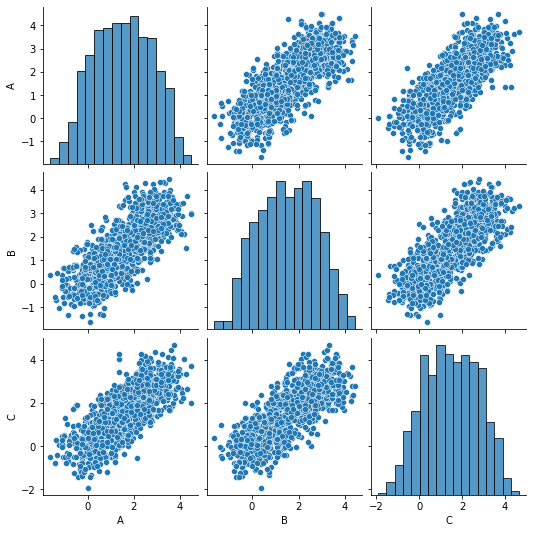

In [4]:
import seaborn as sns
sns.pairplot(data)

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
data = MinMaxScaler().fit_transform(data)
pca = PCA(n_components=2)
pca.fit(data)
data_2d = pca.transform(data)

In [6]:
data_2d

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       ...,
       [-0.13072154,  0.0767816 ],
       [ 0.43722666, -0.02364599],
       [-0.21179279,  0.02825676]])

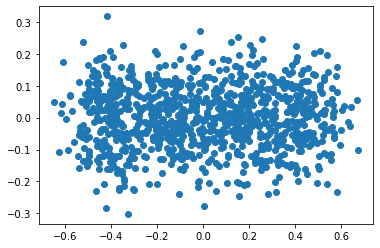

In [7]:
import matplotlib.pyplot as plt
plt.scatter(data_2d.T[0], data_2d.T[1])
plt.show()

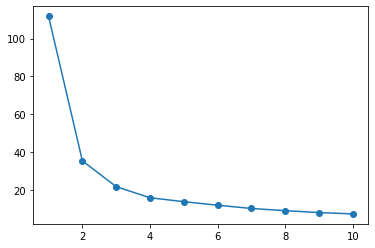

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(data_2d)
    wcss.append(model.inertia_)
plt.plot(range(1,11), wcss, marker='o')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(data_2d)

KMeans(n_clusters=4)

In [10]:
km_clusters = kmeans.predict(data_2d)
import numpy as np
np.unique(km_clusters)

array([0, 1, 2, 3], dtype=int32)

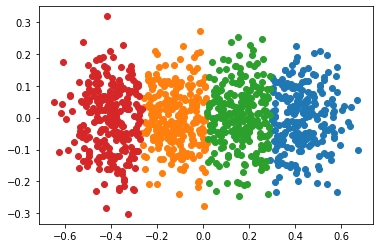

In [11]:
data = data_2d
for cluster in np.unique(km_clusters):
    data_tmp = data[np.where(km_clusters==cluster)]
    plt.scatter(data_tmp.T[0], data_tmp.T[1])
plt.xlim
plt.show()